<a href="https://colab.research.google.com/github/Epilef86/Clusterizacao_/blob/main/Dados_Categ%C3%B3ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

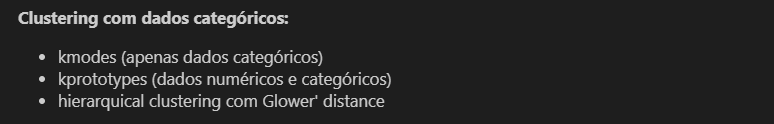

Kmodes lembra um pouco KMeans sendo que não tem como pegar a média de dados categóricos. Ao invés de computar a média, vai computar a moda das observações. Ele funciona apenas para dados categóricos.

Kprototyes é pra dados mistos, ou seja, que tenha dados categóricos e numéricos. Ele une as duas abordagens (KMeans e KModes)

Hierarquical Clustering com Glower quase nunca usada. Na métrica de distanciamento da dissimilaridade se coloca a distância do Glower, que é uma distância que considera tanto a parte numérica contínua como dados categóricos. 

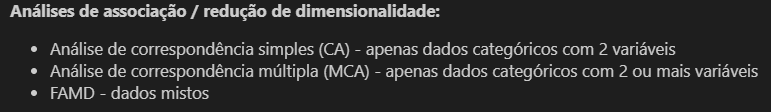

Essa abordagens acima vê o quão próxima são as variáveis entre si, quão associada essas categorias das variáveis categóricas está uma da outra e ela gera componentes numéricos pros dados categóricos. Podemos utilizar essa técnica, existem uma biblioteca chamada prints ?? Pega esses valores para colocar num KMeans, numa clusteriação convencional para gerar os clusters pra cada observação

FAMD é factor Analysis os Mixed Data, que seria o PCA equivalente para mixed data. O PCA por si só, alguns estudiosos não gostam

In [29]:
%%capture
%pip install kmodes

In [30]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [31]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [32]:
from yellowbrick.datasets import load_mushroom

Aqui vai retornar dois dataframes, x que são as características e o y que é qual classe esse cogumelo pertence. Como não estamos interessado em fazer classificação, vamos ignorar essas classes e pegar só o primeiro elemento que é o dataset das features, load_mushroom()[0].

No dataset abaixo vemos dados categóricos: cor do cogumelho, superfície e a forma.

In [33]:
# Load data
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


Dados essas características quero clusterizar essas informações. Para isso posso utilizar KModes. O KModes não é do sklearn, ele assim como KMeans precisa da quantidade de clusters, o default é 8, vou colocar 4. 

In [34]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


No modelo do KMeans a gente tem um atributo que após treinar o modelo que é a inércia do modelo WCSS que é a variância total somada, de forma similar ao KMeans temos os cost, que serve pra separar as observações em clusters então ele vai funconar de forma similar a inércia do KMeans. Esse valor 8851.0
 isolado não quer dizer nada, mas irei comparar com outros clusters e ver qual melhor clusters que fica pra gente, como se fosse a curva do cotovelo.

Para capturar os clusters, vamos fazer o seguinte:

In [35]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

[11560.0, 10343.0, 8851.0, 8111.0, 7203.0, 6708.0, 6416.0, 6190.0, 5882.0]

Vamos plotar isso...

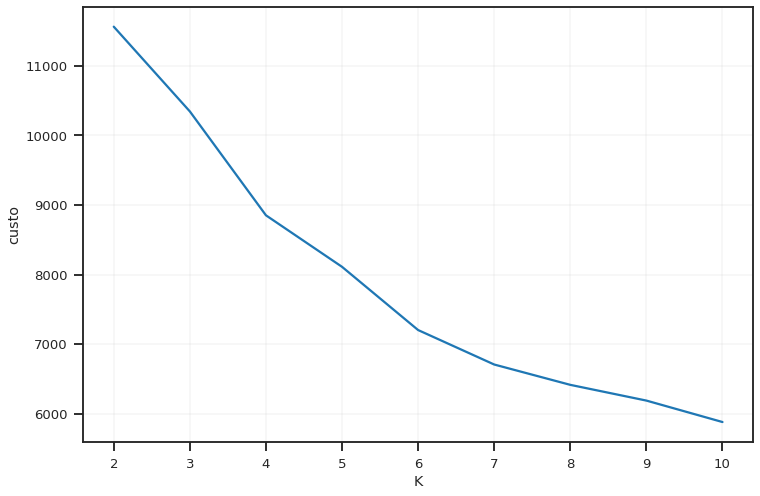

In [36]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

A quantidade ideal pra esse conjunto de dados seria entre k= 6 e 7 pq reduz bastante o custo. 7 seria uma boa opção então separa os clusters e faz a análise descritiva desses 7 clusters, qual o valor que mais aparece, ou seja, a moda.

DADOS MISTOS 

Vou pegar dados desse link sobre diabetes

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [37]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


Já olhando as variáveis, já conseguimos definir quais são numéricas

O KPrototypes vai usar o KMeans pra clusterizar dados numéricos, o KMeans precisa de dados padronizados, tem que estar na mesma escala.

A função scale vai padronizar para que todos os valores tem média 0 e padrão = 1 

In [38]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

Pra as variáveis categóricas preciso pegar o index de cada uma delas pra informar ao nosso modelo KPrototypes, ele pede a quantidade de grupos que se quer formar e quai o index das colunas referentes aos dados categóricos.

columns.isin(categorical_columns) descobrir quais são categoricas 

.nonzero() pega os indices dela, pega todos os valores que não são zero.

.tolist() passa pra uma lista 

In [39]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

Aplicando a modelagem

.fit recebe x, y caso tenha e informar quais são os index das colunas categóricas

In [40]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

KPrototypes(gamma=0.5)

Esses abaixo são os clusters para cada um dos nossos dados

In [41]:
model.predict(df_diabetes, categorical=categorical_idx)

array([1, 2, 2, 2, 6, 0, 6, 2, 0, 0, 0, 6, 2, 4, 6, 3, 6, 1, 2, 0, 4, 2,
       2, 0, 2, 0, 0, 3, 5, 4, 2, 4, 2, 6, 3, 2, 6, 0, 0, 5, 6, 2, 3, 6,
       6, 6, 2, 6, 7, 6, 6, 4, 4, 2, 6, 2, 2, 2, 2, 6, 4, 6, 2, 3, 0, 2,
       3, 2, 2, 4, 4, 2, 2, 6, 2, 6, 3, 0, 2, 4, 2, 6, 6, 6, 3, 5, 4, 2,
       3, 4, 2, 2, 2, 6, 3, 7, 5, 4, 6, 2, 2, 1, 0, 2, 2, 4, 0, 6, 2, 6,
       0, 0, 6, 2, 6, 2, 2, 4, 2, 6, 7, 6, 2, 6, 2, 2, 3, 0, 2, 4, 0, 6,
       2, 2, 6, 6, 7, 4, 3, 7, 6, 2, 2, 4, 7, 0, 2, 0, 2, 2, 1, 4, 0, 0,
       2, 4, 2, 2, 4, 6, 2, 6, 2, 2, 2, 7, 7, 1, 4, 1, 4, 2, 4, 1, 7, 3,
       4, 6, 3, 7, 5, 7, 6, 4, 1, 6, 7, 7, 2, 2, 6, 7, 7, 1, 1, 1, 1, 4,
       7, 4, 2, 7, 7, 0, 1, 6, 4, 1, 3, 0, 4, 1, 3, 6, 4, 5, 7, 5, 1, 6,
       5, 1, 4, 1, 3, 1, 7, 3, 0, 7, 2, 7, 0, 7, 7, 6, 6, 6, 4, 2, 1, 0,
       1, 7, 7, 6, 5, 0, 0, 1, 1, 3, 7, 4, 0, 6, 7, 7, 0, 3, 0, 2, 7, 4,
       7, 4, 1, 3, 7, 7, 3, 1, 7, 4, 3, 2, 7, 4, 6, 1, 3, 3, 7, 2, 7, 7,
       0, 0, 5, 7, 0, 5, 1, 0, 3, 1, 4, 7, 7, 3, 1,

In [42]:
# Avaliando modelo
model.cost_

1053.3581184899256

In [43]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[1566.2403908950237,
 1400.5307652004929,
 1299.5221751222673,
 1207.8251382964102,
 1149.8608013678515,
 1098.2782888447657,
 1054.6736109501587,
 1020.0578597573252,
 986.9650935733497]

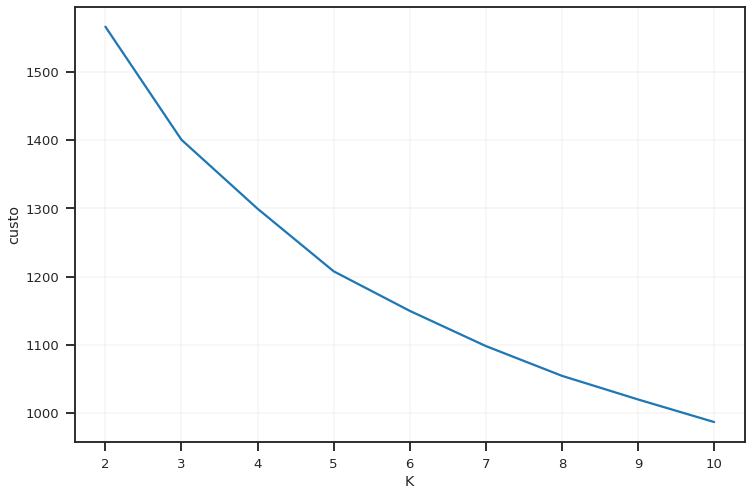

In [44]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

Deu um valor próximo de k=7, 8. Então eu pegaria o 8 e começaria a descrever os clusters.A descrição dos clusters veremos mais a frente na prática.